In [462]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [463]:
df=pd.read_csv("leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# reading and understanding of data

In [464]:
df.shape

(9240, 37)

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [466]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# data cleaning

In [467]:
#check null values in each coulmn in dataframe
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [468]:
# duplicate check
df.loc[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [469]:
# check the original conversion rate.
original_Conversion_rate=round((sum(df['Converted'])/len(df['Converted'].index)) *100,2)
print("The conversion rate of leads is ",original_Conversion_rate)

The conversion rate of leads is  38.54


In [470]:
#check the number of unique valuses per column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [471]:
df=df.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], 
           axis=1)  
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [472]:
# drop Prospect ID that it has all unique values.
df.drop(['Prospect ID'],1 , inplace= True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [473]:
# check the percentage of missing values in each columns
missing_val_per=round(100*(df.isnull().sum()/len(df.index)), 2)
missing_val_per

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

There are few columns more than 40%  of missing values.
We will drop these columns having more than 40 % of missing values.

In [474]:
df.drop(['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
        1,inplace=True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Select,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Select,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [475]:
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

still there are null values greater than 15%. let us explore these columns.

In [476]:
df.City.describe() # check city column

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [477]:
df.City.value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [478]:
# in city column replace null values by 'mumbai'.
df['City']=df['City'].replace(np.nan, 'Mumbai')

In [479]:
df.City.value_counts(normalize=True)

Mumbai                         0.502381
Select                         0.243398
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [480]:
# check Specialization column
df.Specialization.describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [481]:
df.Specialization.value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

#observation
lead does not mention Specialization may be his/ her option is not present.
may be lead is student with no Specialization.
hence we make a category "others" for missing values.

In [482]:
df['Specialization']=df['Specialization'].replace(np.nan, 'others')


In [483]:
df.Specialization.value_counts(normalize=True)

Select                               0.210173
others                               0.155628
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [484]:
#check Tags column
df.Tags.describe() 

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [485]:
df.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

#observation
Tags columns contains 35.19% of data with tag- 'Will revert after reading the email' and 36.29% of null values. 
These tags are added by sales team of X Education and may vary with time since its added based on the understanding of the sales team.
Hence not much reliable and we can drop this column.

In [486]:
df=df.drop('Tags',  axis=1)

In [487]:
# check What matters most to you in choosing a course column
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [488]:
df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

observation
this column is heavily skrewd towards better career prospects so we can drop this column
because all the canditates are looking for better career options.

In [489]:
df=df.drop('What matters most to you in choosing a course', axis=1) # drop the column

In [490]:
# check what is your current occupation column.
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [491]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

observation
almost 85% of data is unemployed so we can replace the mising values by 'unemployed'

In [492]:
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed') 


In [493]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [494]:
# check country column
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [495]:
df.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

observation
around 97% of data is India and 27% of data is missing hence we can drop this column.

In [496]:
df=df.drop('Country', axis=1)

In [497]:
# check percentage of null values.
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

In [498]:
#now missing values are less than 2% so we can drop them.
df.dropna(inplace = True) 

In [499]:
# check for percentage of null values in each column 
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# Univariate Analysis and Bi-variate Analysis

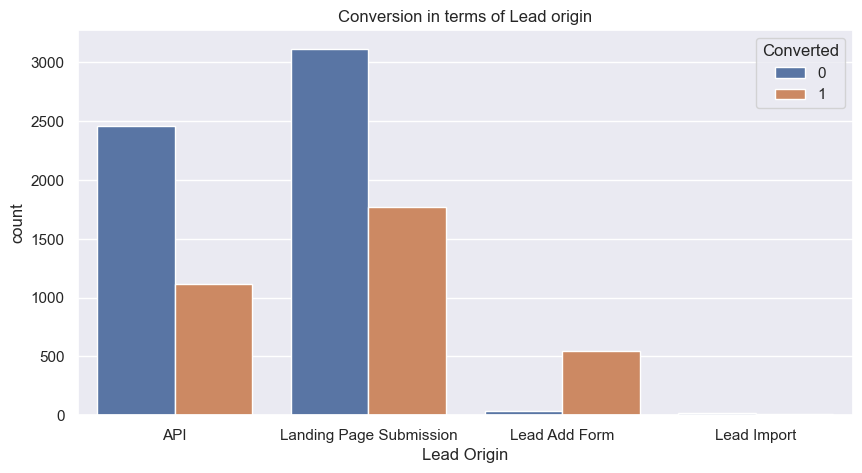

In [500]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.title("Conversion in terms of Lead origin")
plt.show()

In [501]:
#def function conversion summary
def conversion_summary(df,col):
    convert=df.pivot_table(values='Lead Number',index=col ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion(%)"] =round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending=False,by="Conversion(%)"))

In [502]:
conversion_summary(df,"Lead Origin")

Converted                   0     1  Conversion(%)
Lead Origin                                       
Lead Add Form              37   544           94.0
Landing Page Submission  3118  1767           36.0
API                      2463  1115           31.0
Lead Import                21     9           30.0


Observation:
from the plot and lead conversion summary we infer that
1.Lead Add Form has highest conversion rate 94%.
2.Landing Page Submission and API has 36-31 % conversion rate but they generate maximum leads counts.
3.Lead Import has least amount of conversion and lead counts.
4.To improve overall lead conversion rate, focus should be on improving lead conversion rate of API and Landing Page Submission.
Also,generate more leads from Lead Add form since they have a very good conversion rate

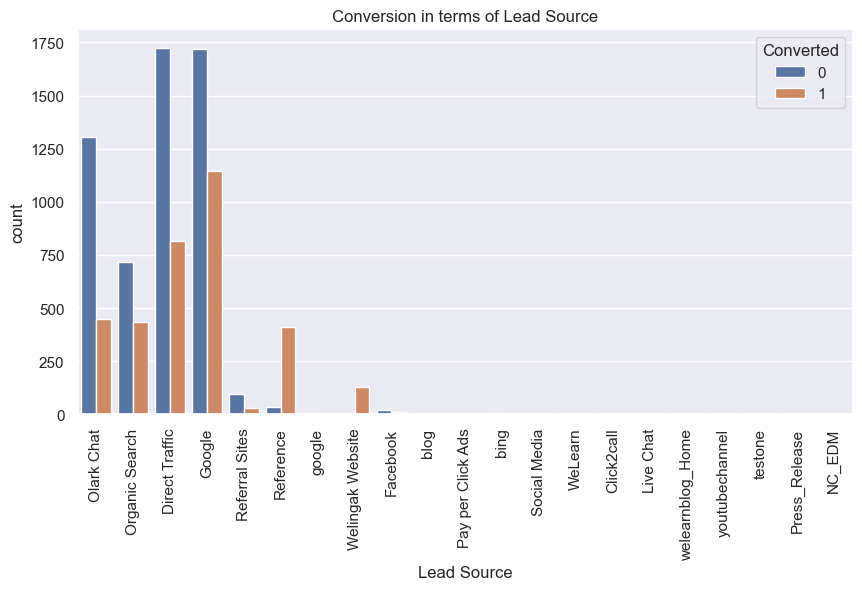

In [503]:
plt.figure(figsize=(10,5))
sns.countplot(x="Lead Source", hue ="Converted", data =df)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

Observation
few lead sources have very low count.Hence we can merge them into common category "others".
also there are two category with same name we can replace google with Google to have single category.

In [504]:
df['Lead Source']=df['Lead Source'].replace(['google'],'Google')

In [505]:
df['Lead Source']=df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

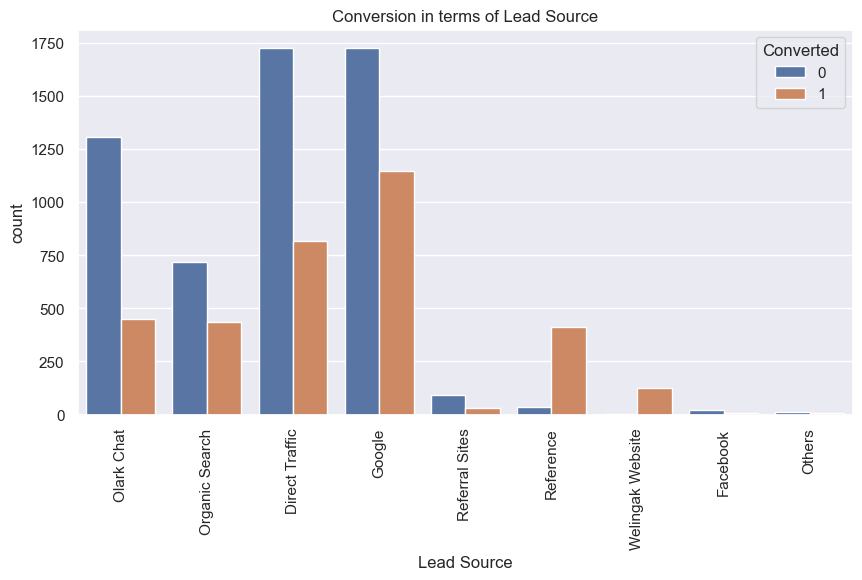

In [506]:
plt.figure(figsize=(10,5))
sns.countplot(x="Lead Source", hue ="Converted", data =df)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

In [507]:
conversion_summary(df,"Lead Source")

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   127           98.0
Reference           33   410           93.0
Google            1726  1147           40.0
Others              14     9           39.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Facebook            22     9           29.0
Olark Chat        1305   448           26.0
Referral Sites      94    31           25.0


from the above plot and conversion summary we will infer that.
1.Welingak Website and Reference has highest converstion rate 98% and 93% but generate less number of leads.
2.google and direct traffic has maximum leads but converstion rate is 43% and 33% respectively.
3.Olark Chat and Organic Search generate significant number of leads but converstion rate is 42% and 39 % respectively.
4.Lead source in 'others' category such as Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' generates very less leads.
5.To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, 
direct traffic and google lead source .Also , generate more leads from reference and welingak website since they have a 
very good conversion rate

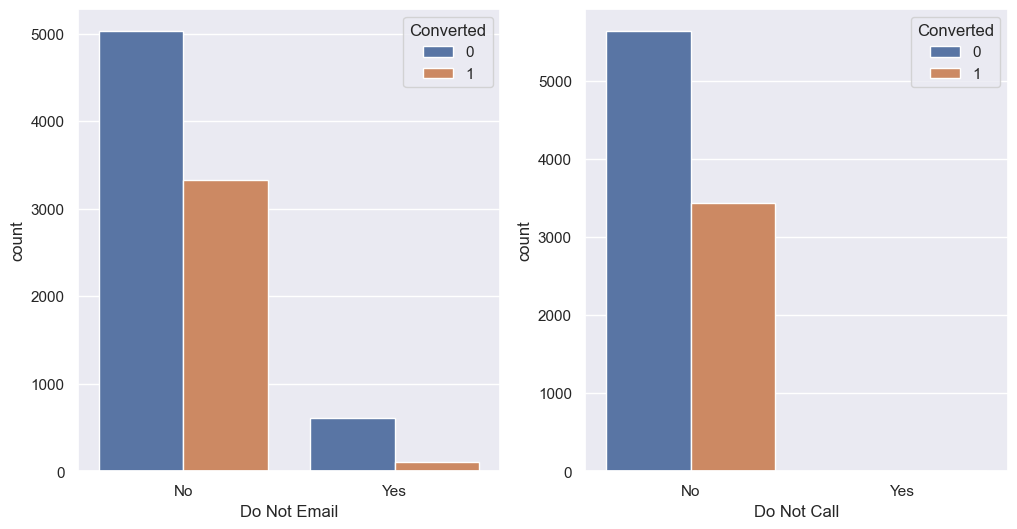

In [508]:
fig, axs =plt.subplots(1,2,figsize=(12,6))
sns.countplot(x="Do Not Email",hue ="Converted", data=df,ax= axs[0])
sns.countplot(x="Do Not Call",hue ="Converted", data=df,ax= axs[1])
plt.show()

In [509]:
conversion_summary(df,"Do Not Email")

Converted        0     1  Conversion(%)
Do Not Email                           
No            5027  3331           40.0
Yes            612   104           15.0


In [510]:
conversion_summary(df,"Do Not Call")

Converted         0       1  Conversion(%)
Do Not Call                               
Yes             0.0     2.0          100.0
No           5639.0  3433.0           38.0


from the plot and conversion_summary we can infer that:
Around 99% of customers do not like to be called and 15% do not receive emails about the course.

There are a number of outliers in Total Visits column.We will cap the outliers to 95%.

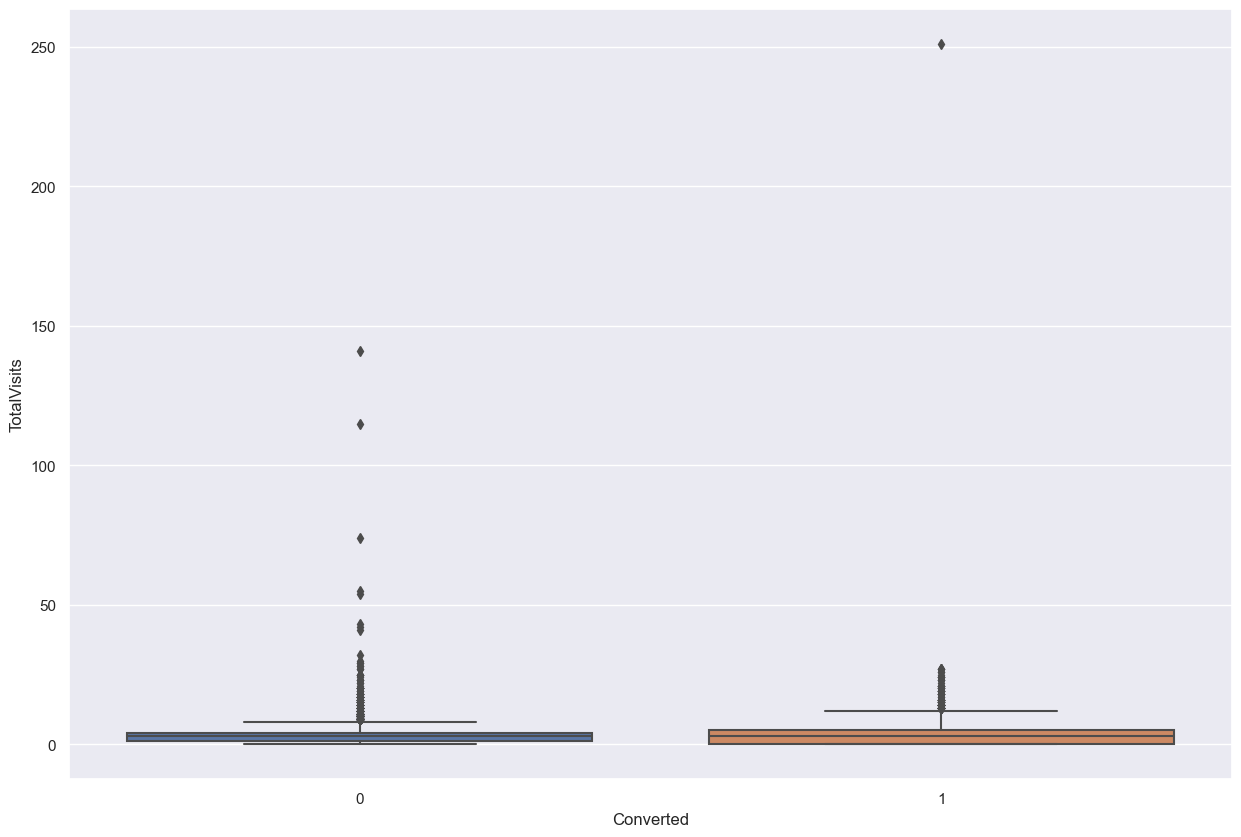

In [511]:
#totalvisits 
plt.figure(figsize=(15,10))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

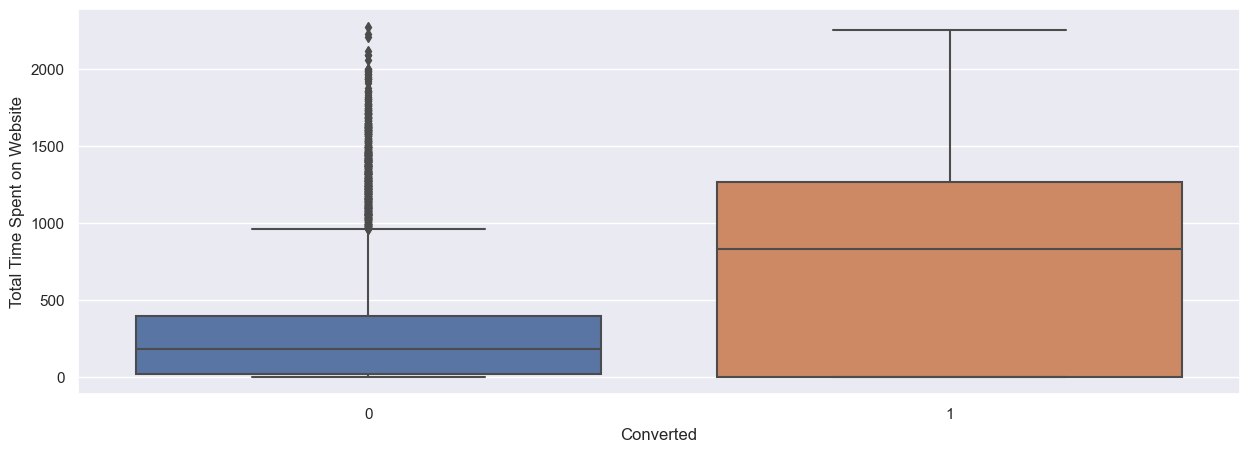

In [512]:
#Total time spent on website
plt.figure(figsize=(15,5))
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=df)
plt.show()

people spending more time on website have more chances of opting courses.
people spending less time on website did not opt any courses.

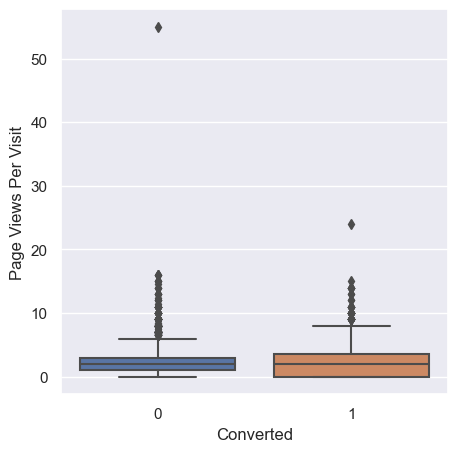

In [513]:
### Page views per visit
plt.figure(figsize=(5,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

observations:
median for converted and non converted both are same.
people who visit avergae number of pages on website having equal chances of applying and not applying for the course.
People who dont visit any pages have higher conversion chances

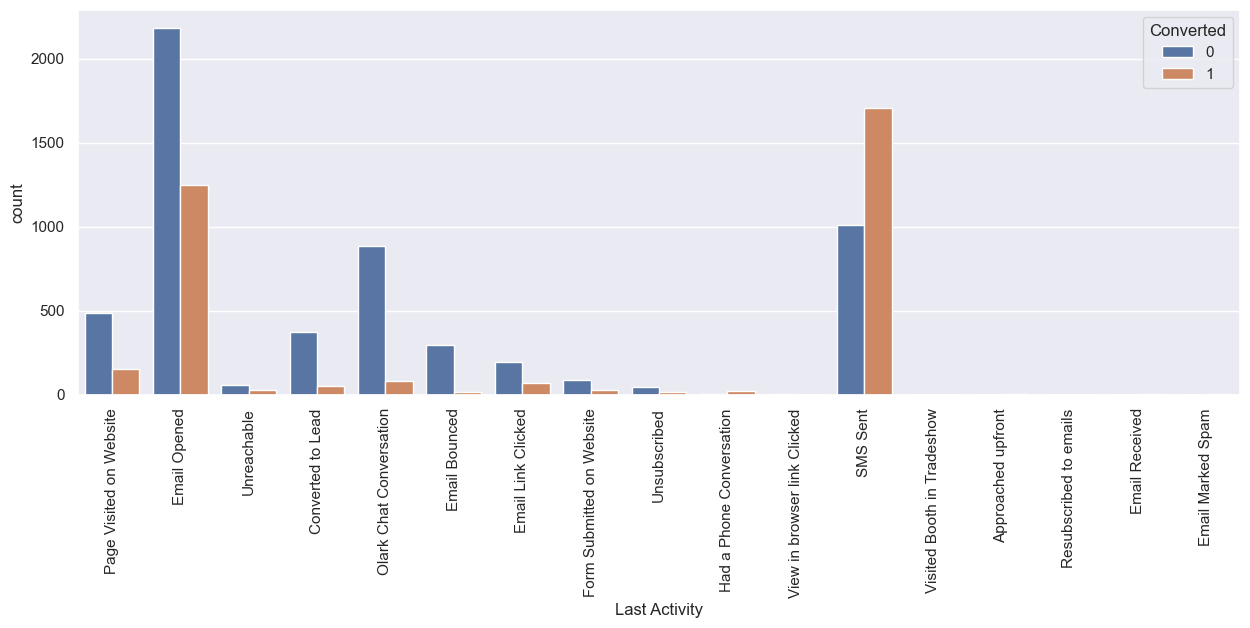

In [514]:
### Last Activity
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [515]:
conversion_summary(df,"Last Activity")

Converted                          0       1  Conversion(%)
Last Activity                                              
Approached upfront               0.0     5.0          100.0
Email Marked Spam                0.0     2.0          100.0
Resubscribed to emails           0.0     1.0          100.0
Email Received                   0.0     2.0          100.0
Had a Phone Conversation         5.0    20.0           80.0
SMS Sent                      1011.0  1705.0           63.0
Email Opened                  2182.0  1250.0           36.0
Unreachable                     61.0    29.0           32.0
Email Link Clicked             194.0    73.0           27.0
Form Submitted on Website       88.0    28.0           24.0
Page Visited on Website        489.0   151.0           24.0
Unsubscribed                    45.0    14.0           24.0
View in browser link Clicked     5.0     1.0           17.0
Converted to Lead              374.0    54.0           13.0
Olark Chat Conversation        888.0    

observation
from the box plot and conversion summary we can infer that.
1.Maximum lead generated are generated from last activity- SMS Sent and Email Opened but conversion rate is about 63% 
and 36% respectively.
2.Least leads are generated from people with last activity - Approached upfront,Email Marked Spam,Resubscribed to emails ,
emails received,View in browser link Clicked,Visited Booth in Tradeshow.
3.olark chat conversation and Page Visited on Website generates significant number of leads but their conversion rate is
around 9% and 24%.
4.o improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity -olark 
chat conversation,SMS sent and Page Visited on Website .



### Specialization

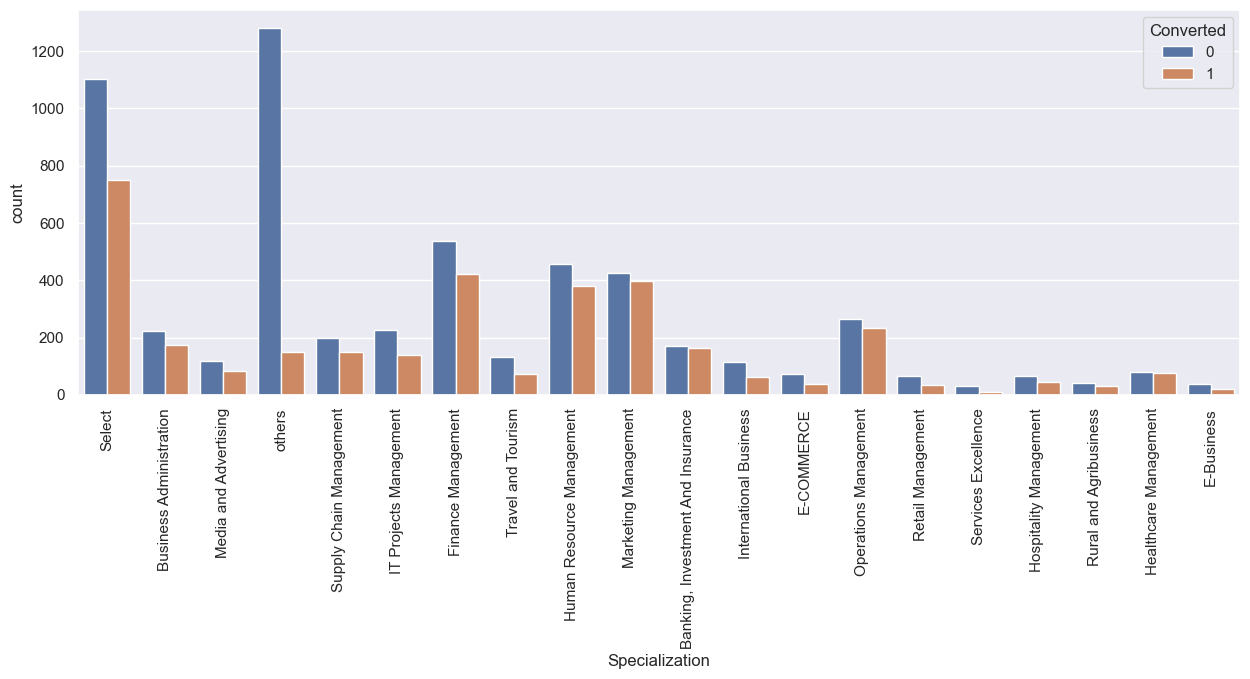

In [516]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [517]:
conversion_summary(df,"Specialization")

Converted                             0    1  Conversion(%)
Specialization                                             
Banking, Investment And Insurance   171  164           49.0
Healthcare Management                80   76           49.0
Marketing Management                426  397           48.0
Operations Management               265  234           47.0
Human Resource Management           457  380           45.0
Business Administration             224  175           44.0
Finance Management                  537  422           44.0
Supply Chain Management             198  148           43.0
Media and Advertising               118   84           42.0
Rural and Agribusiness               42   31           42.0
Select                             1101  750           41.0
Hospitality Management               66   45           41.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
Travel and Tourism                  131 

observation from the above plot and conversion summary we infer that:
most of the specialization have 40-50% conversion rate.

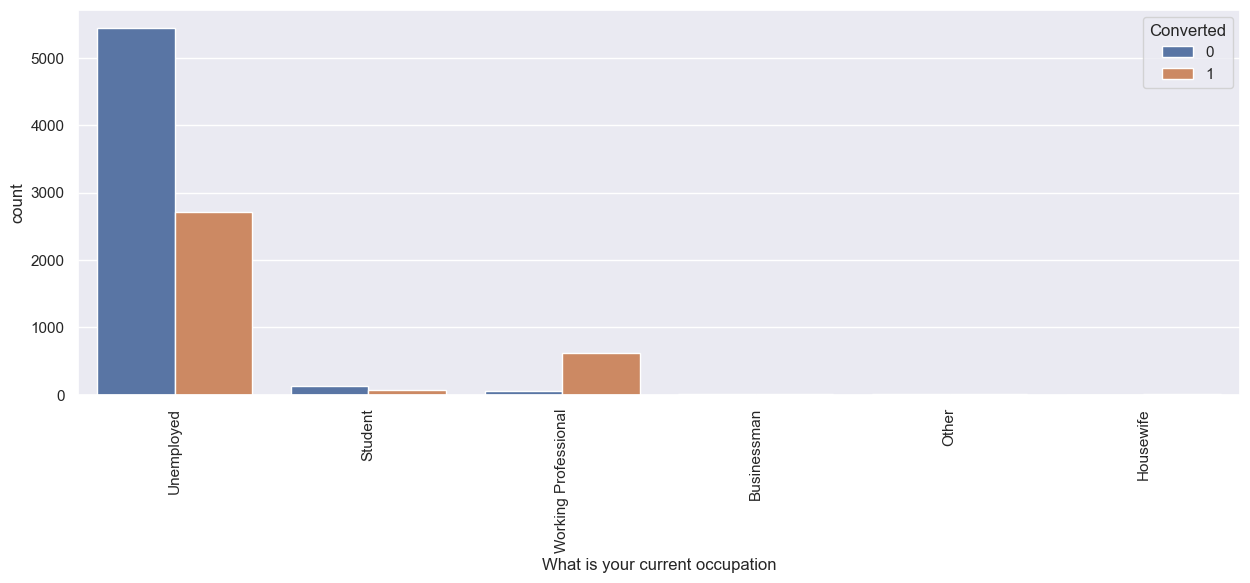

In [518]:
### Occupation
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data =df)
plt.xticks(rotation = 90)
plt.show()

observation
working professionals and unemployed people generate maximum leads.

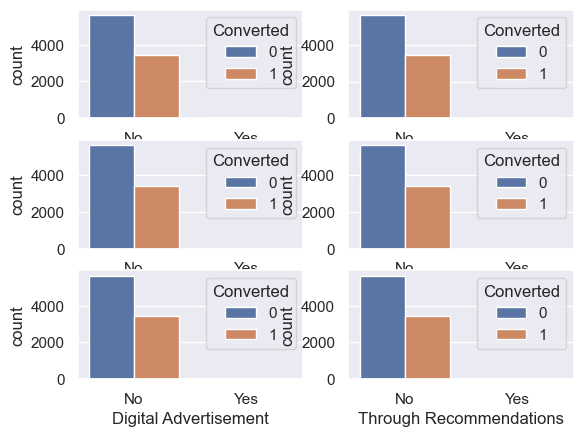

In [519]:
### Search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement ,Through Recommendations
plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data =df)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data =df)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data =df)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data =df)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data =df)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data =df)

plt.show()


observation.
Almost 99% customers have not seen the X education ad in search, Newspaper article , X Education Forums , Newspaper, 
Digital Advertisement or Through Recommendations

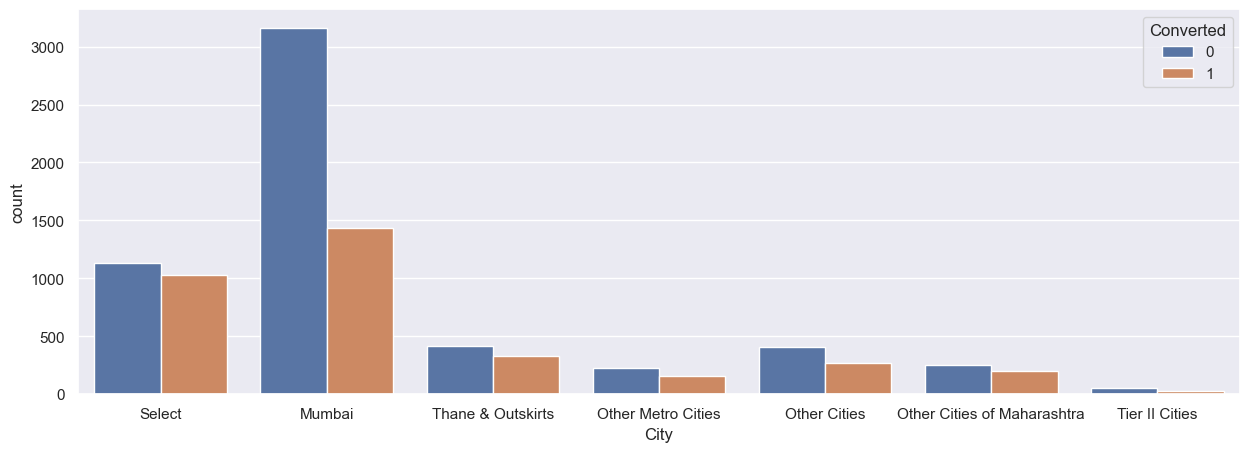

In [520]:
### City
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data =df)
plt.show()

In [521]:
conversion_summary(df,'City')

Converted                       0     1  Conversion(%)
City                                                  
Select                       1131  1025           48.0
Thane & Outskirts             413   332           45.0
Other Cities of Maharashtra   250   196           44.0
Other Metro Cities            223   154           41.0
Other Cities                  408   272           40.0
Tier II Cities                 49    25           34.0
Mumbai                       3165  1431           31.0


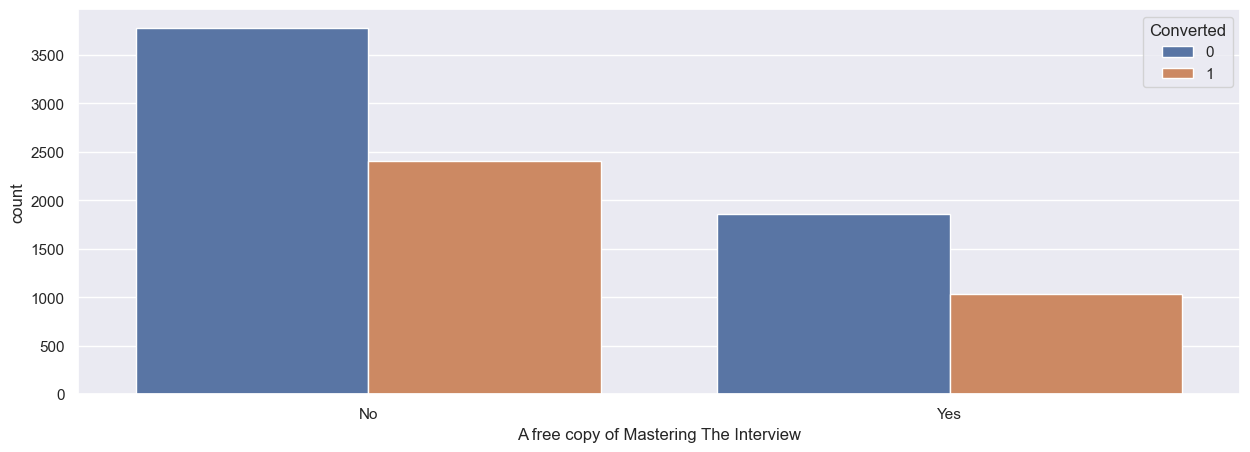

In [522]:
### A free copy of Mastering The Interview
plt.figure(figsize=(15,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data =df)
plt.show()

In [523]:
conversion_summary(df,"A free copy of Mastering The Interview")

Converted                                  0     1  Conversion(%)
A free copy of Mastering The Interview                           
No                                      3781  2405           39.0
Yes                                     1858  1030           36.0


Observation
Most of the customers didnt want the free copy of Mastering The Interview.
Customers who opted for free copy had conversion rate of 36% while the ones who didnt opt had conversion rate of 39%.

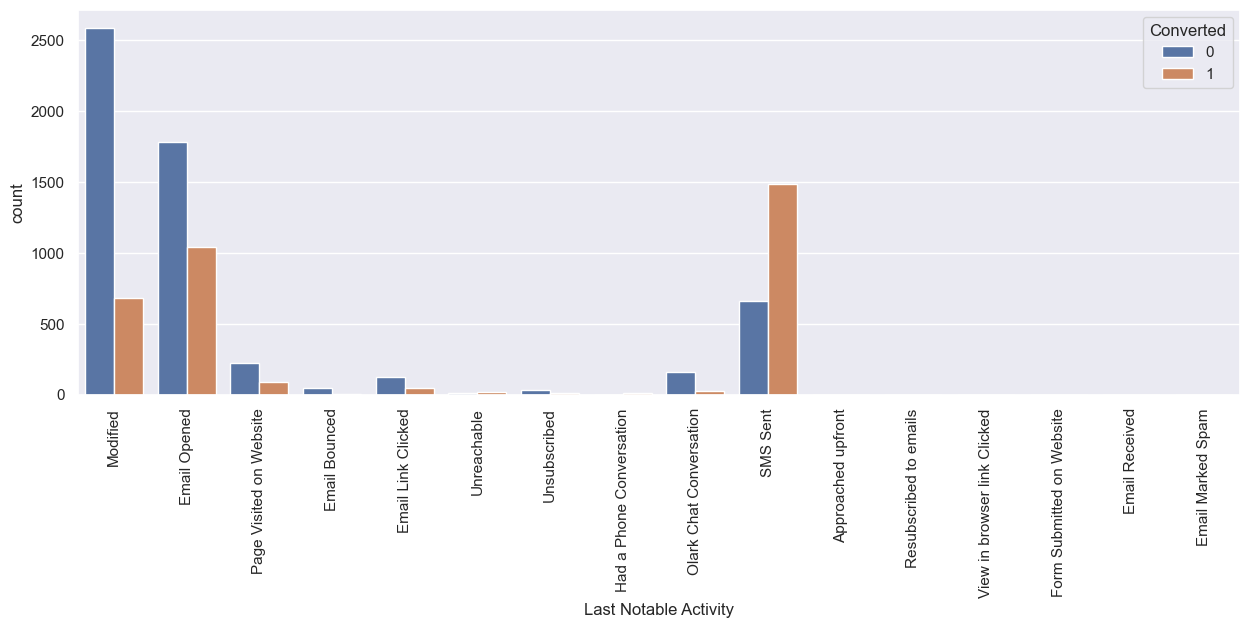

In [524]:
### Last Notable Activity
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data =df)
plt.xticks(rotation = 90)
plt.show()

Observation
This column is very much similar to Last activity column.

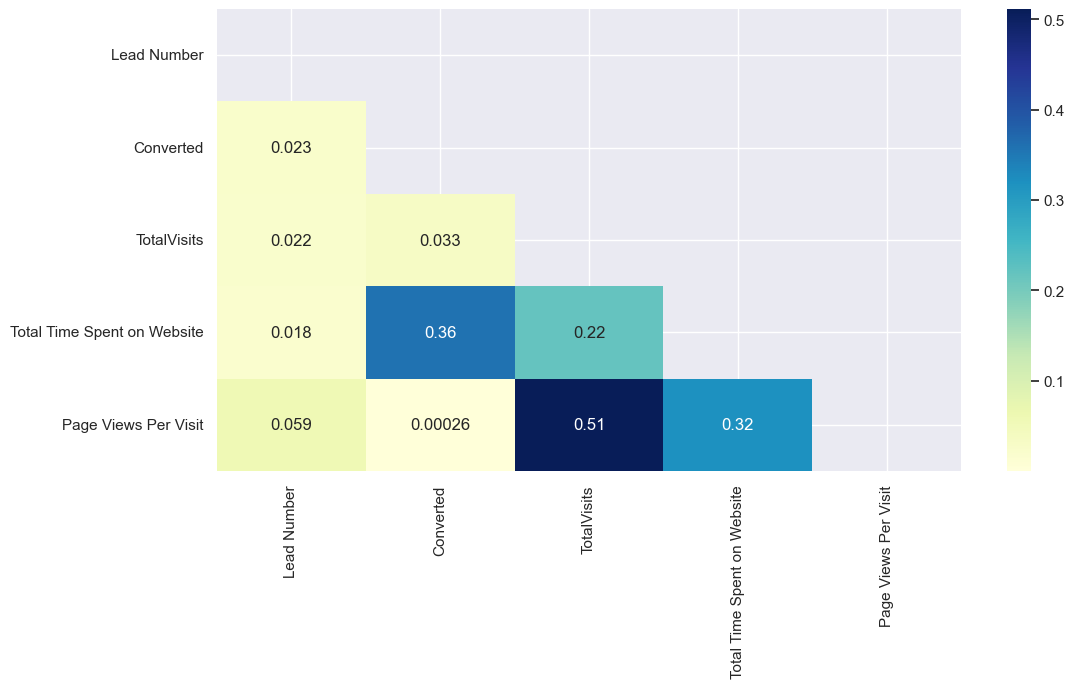

In [525]:
#check correlation among variables
plt.figure(figsize = (12,6))
mask = np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

Observation
Total visits and Page views per visit column are correlated.
Hence we should have either of this column in our model to avoid multi-collinearity.

Based on our data analysis , we conclude that many variables are not significant to the model.Hence we can drop them for further analysis.

In [526]:
df = df.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [527]:
df.shape

(9074, 14)

# Step 4: Data Preparation

Converting binary variables (Yes/No) to 1/0

In [528]:
# List of binary variables
varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
df[varlist] = df[varlist].apply(binary_map)

Create a dummy variable for the categorical variables

In [529]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_data = pd.get_dummies(df[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [530]:
# Combining dummy data with the original dataset
df = pd.concat([df, dummy_data], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [531]:
# Drop the original columns 
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source_Others','Specialization_others']
df = df.drop(drop_cols, axis=1)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [532]:
df.shape

(9074, 77)

# STEP-5 Train and Test Split

In [533]:
#putting feature variable
X= df.drop(['Converted'], axis =1)


# Putting response variable to y
y = df['Converted']

In [534]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# STEP-6 feature scaling 

In [535]:
# create object of StandardScaler
scaler= StandardScaler()

# apply scaler() to the numerical columns
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.160255,-0.284595,-0.179666,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.540048,-0.284595,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.888650,-0.671384,-1.132538,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,1.643304,-0.284595,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,2.017593,0.295588,0.058552,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [536]:
rfe=RFE(estimator=LogisticRegression(),n_features_to_select=20)   # running RFE with 15 variables as output
rfe=rfe.fit(X_train,y_train) 

In [537]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [538]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', False, 44),
 ('Page Views Per Visit', False, 49),
 ('A free copy of Mastering The Interview', False, 52),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Marked Spam', False, 28),
 ('Last Activity_Email Opened', False, 54),
 ('Last Activity_Email Received', False, 50),
 ('Last Activity_Form Submitted on Website', False, 32),
 ('Last Activity_Had a Phone 

In [539]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'TotalVisits', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [540]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization

# step-9 Modell Building 

In [541]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.1
Date:                Sat, 16 Sep 2023   Deviance:                       5246.2
Time:                        14:58:34   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3765      0.603      2.282      0.022       0.194       2.559
Do Not Email                                            -1.6059      0.200     -8.040      0.000      -1.997      -1.214
TotalVisits                                              1.1340      0.041     27.904      0.000       1.054       1.214
Lead Origin_Lead Add Form                                2.1380      0.927      2.308      0.021       0.322       3.954
Lead Origin_Lead Import                                  1.5445      0.457      3.378      0.001       0.648       2.441
Lead Source_Olark Chat                                   1.2434      0.104     11.904      0.000       1.039       1.448
Lead Source_Reference                                    1.8217      0.951      1.915      0.056      -0.043       3.686
Lead Source_Welingak Website                             3.8664      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1086      0.228     -4.857      0.000      -1.556      -0.661
Last Activity_Email Bounced                             -1.2769      0.425     -3.002      0.003      -2.111      -0.443
Last Activity_Had a Phone Conversation                   1.9240      0.783      2.458      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3307      0.191     -6.983      0.000      -1.704      -0.957
What is your current occupation_Housewife               21.6424   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.7930      0.638     -1.242      0.214      -2.044       0.458
What is your current occupation_Unemployed              -1.1988      0.599     -2.001      0.045      -2.373      -0.024
What is your current occupation_Working Professional     1.5641      0.626      2.498      0.012       0.337       2.791
Last Notable Activity_Email Link Clicked                -1.8842      0.255     -7.377      0.000      -2.385      -1.384
Last Notable Activity_Email Opened                      -1.4250      0.088    -16.122      0.000      -1.598      -1.252
Last Notable Activity_Modified                          -1.7447      0.100    -17.394      0.000      -1.941      -1.548
Last Notable Activity_Olark Chat Conversation           -1.5331      0.369     -4.152      0.000      -2.257      -0.809
Last Notable Activity_Page Visited on Website           -1.6991      0.202     -8.399      0.000      -2.096      -1.303
========================================================================================================================
"""

In [542]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.09
6,Lead Source_Welingak Website,15.47
13,What is your current occupation_Unemployed,4.40
17,Last Notable Activity_Modified,3.09
16,Last Notable Activity_Email Opened,2.27
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


#Observation 
The p value for column 'What is your current occupation_Housewife' is very high and above the threshold. 
Hence we will drop this column from our model

In [543]:
col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'TotalVisits', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [544]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.0
Date:                Sat, 16 Sep 2023   Deviance:                       5249.9
Time:                        14:58:35   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8072      0.557      3.245      0.001       0.716       2.899
Do Not Email                                            -1.6087      0.200     -8.045      0.000      -2.001      -1.217
TotalVisits                                              1.1329      0.041     27.899      0.000       1.053       1.213
Lead Origin_Lead Add Form                                2.1374      0.926      2.307      0.021       0.322       3.953
Lead Origin_Lead Import                                  1.5422      0.457      3.373      0.001       0.646       2.438
Lead Source_Olark Chat                                   1.2414      0.104     11.887      0.000       1.037       1.446
Lead Source_Reference                                    1.8263      0.951      1.920      0.055      -0.038       3.691
Lead Source_Welingak Website                             3.8666      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1055      0.228     -4.844      0.000      -1.553      -0.658
Last Activity_Email Bounced                             -1.2726      0.426     -2.991      0.003      -2.107      -0.439
Last Activity_Had a Phone Conversation                   1.9249      0.783      2.459      0.014       0.391       3.459
Last Activity_Olark Chat Conversation                   -1.3304      0.191     -6.976      0.000      -1.704      -0.957
What is your current occupation_Student                 -1.2238      0.595     -2.057      0.040      -2.390      -0.058
What is your current occupation_Unemployed              -1.6290      0.553     -2.946      0.003      -2.713      -0.545
What is your current occupation_Working Professional     1.1336      0.582      1.948      0.051      -0.007       2.274
Last Notable Activity_Email Link Clicked                -1.8809      0.255     -7.378      0.000      -2.381      -1.381
Last Notable Activity_Email Opened                      -1.4229      0.088    -16.103      0.000      -1.596      -1.250
Last Notable Activity_Modified                          -1.7475      0.100    -17.419      0.000      -1.944      -1.551
Last Notable Activity_Olark Chat Conversation           -1.5323      0.369     -4.150      0.000      -2.256      -0.809
Last Notable Activity_Page Visited on Website           -1.7018      0.202     -8.416      0.000      -2.098      -1.305
========================================================================================================================
"""

In [545]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.08
6,Lead Source_Welingak Website,15.47
12,What is your current occupation_Unemployed,4.37
16,Last Notable Activity_Modified,3.08
15,Last Notable Activity_Email Opened,2.25
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


Observation 
p-value and VIF value for for column 'Lead Source_Reference' is high and above the threshold.Hence we will drop this column.

In [546]:
col3 = col2.drop('Lead Source_Reference',1)
col3

Index(['Do Not Email', 'TotalVisits', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [547]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.5
Date:                Sat, 16 Sep 2023   Deviance:                       5252.9
Time:                        14:58:35   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8104      0.556      3.254      0.001       0.720       2.901
Do Not Email                                            -1.6042      0.200     -8.036      0.000      -1.995      -1.213
TotalVisits                                              1.1321      0.041     27.879      0.000       1.053       1.212
Lead Origin_Lead Add Form                                3.8941      0.222     17.525      0.000       3.459       4.330
Lead Origin_Lead Import                                  1.5407      0.457      3.370      0.001       0.645       2.437
Lead Source_Olark Chat                                   1.2385      0.104     11.854      0.000       1.034       1.443
Lead Source_Welingak Website                             2.1077      0.755      2.792      0.005       0.628       3.587
Last Activity_Converted to Lead                         -1.1061      0.228     -4.848      0.000      -1.553      -0.659
Last Activity_Email Bounced                             -1.2767      0.425     -3.001      0.003      -2.110      -0.443
Last Activity_Had a Phone Conversation                   1.9242      0.783      2.459      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3294      0.191     -6.972      0.000      -1.703      -0.956
What is your current occupation_Student                 -1.2245      0.594     -2.060      0.039      -2.389      -0.060
What is your current occupation_Unemployed              -1.6322      0.552     -2.956      0.003      -2.715      -0.550
What is your current occupation_Working Professional     1.1322      0.581      1.948      0.051      -0.007       2.271
Last Notable Activity_Email Link Clicked                -1.8768      0.255     -7.372      0.000      -2.376      -1.378
Last Notable Activity_Email Opened                      -1.4222      0.088    -16.099      0.000      -1.595      -1.249
Last Notable Activity_Modified                          -1.7466      0.100    -17.418      0.000      -1.943      -1.550
Last Notable Activity_Olark Chat Conversation           -1.5312      0.369     -4.148      0.000      -2.255      -0.808
Last Notable Activity_Page Visited on Website           -1.7066      0.203     -8.422      0.000      -2.104      -1.309
========================================================================================================================
"""

In [548]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.37
15,Last Notable Activity_Modified,3.08
14,Last Notable Activity_Email Opened,2.25
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
7,Last Activity_Email Bounced,1.76
2,Lead Origin_Lead Add Form,1.61
16,Last Notable Activity_Olark Chat Conversation,1.38
5,Lead Source_Welingak Website,1.33


observation
The VIF values of all the variables are under threshold value 3.
The p value of all variables are under threshold value 0.05.
Hence we will consider Model 3 as our final model for further analysis

In [549]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.193811
1012    0.365951
9226    0.208188
4750    0.884791
7987    0.671677
1281    0.771369
2880    0.096063
4971    0.911619
7536    0.865125
1248    0.630664
dtype: float64

In [550]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19381057, 0.36595111, 0.20818802, 0.88479117, 0.67167662,
       0.77136877, 0.09606302, 0.91161857, 0.86512523, 0.630664  ])

# Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [551]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID
0,0,0.193811,3009
1,0,0.365951,1012
2,0,0.208188,9226
3,1,0.884791,4750
4,1,0.671677,7987


In [552]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.193811,3009,0
1,0,0.365951,1012,0
2,0,0.208188,9226,0
3,1,0.884791,4750,1
4,1,0.671677,7987,1


# Step 10: Model Evaluation

In [553]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 726 1720]]


In [554]:
# check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8154621319477248


In [555]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [556]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.7

In [557]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.89

In [558]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11421254801536491


In [559]:
# positive predictive value 
print (TP / float(TP+FP))

0.7940904893813481


In [560]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8265232974910395


# Step 11: Plotting the ROC Curve

In [561]:
#### ROC shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [562]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [563]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

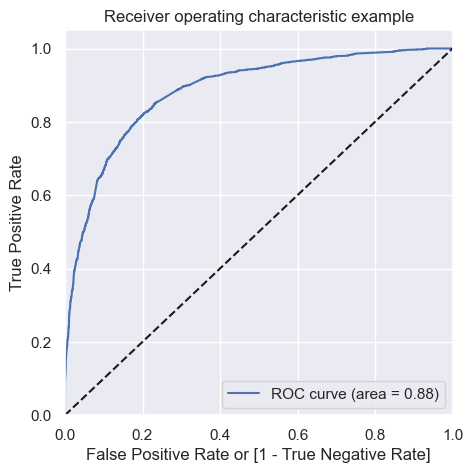

In [564]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

The ROC Curve should be a value close to 1. We are getting a value of 0.88 indicating a good predictive model.

# Step 12: Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value.
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [565]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.193811,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.365951,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.208188,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.884791,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.671677,7987,1,1,1,1,1,1,1,1,0,0,0


In [566]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.385136     1.000000    0.000000
0.1          0.1  0.597071     0.969338    0.363892
0.2          0.2  0.749961     0.918643    0.644302
0.3          0.3  0.799244     0.843827    0.771319
0.4          0.4  0.814045     0.771055    0.840973
0.5          0.5  0.815462     0.703189    0.885787
0.6          0.6  0.810109     0.639820    0.916773
0.7          0.7  0.780979     0.513491    0.948528
0.8          0.8  0.759565     0.422731    0.970551
0.9          0.9  0.715006     0.277596    0.988988


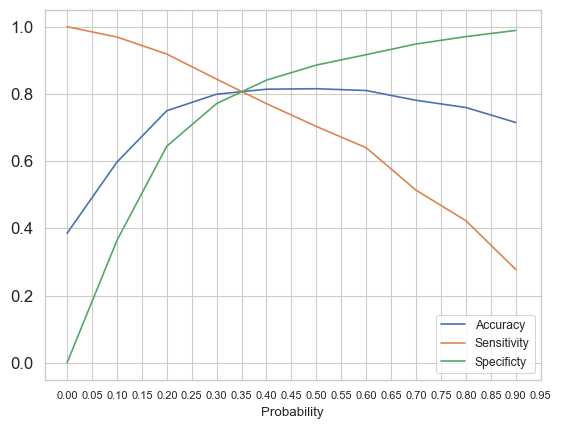

In [567]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

Observation
From the above curve we can see that the optimal cutoff is at 0.35. 
This is the point where all the parameters - Accuracy,Sensitivity,Specificity are equally balanced

In [568]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.193811,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.365951,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.208188,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.884791,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.671677,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [569]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.193811,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.365951,1012,0,1,1,1,1,0,0,0,0,0,0,1,37
2,0,0.208188,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.884791,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.671677,7987,1,1,1,1,1,1,1,1,0,0,0,1,67


In [570]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8082191780821918

In [571]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[3150,  755],
       [ 463, 1983]], dtype=int64)

In [572]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [573]:
# Let's check the sensitivity 
TP / float(TP+FN)

0.8107113654946853

In [574]:
# Let us calculate specificity
TN / float(TN+FP)

0.8066581306017926

In [575]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.19334186939820744


In [576]:
# positive predictive value 
print (TP / float(TP+FP))

0.7242512783053323


In [577]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8718516468308884


# Step 13: Metrics - Precision and Recall

To attain more stability and predict successfully in our model one needs to check two important parameters -precision and recall which tells us the score for result relevancy and how many truly relevant results are returned

In [578]:
#Calculating Precision
precision =round(TP/float(TP+FP),2)
precision

0.72

In [579]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.81

In [580]:
#Calculating precision using precision_score function from sklearn
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7242512783053323

In [581]:
#Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107113654946853

In [582]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted , y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3905
           1       0.72      0.81      0.77      2446

    accuracy                           0.81      6351
   macro avg       0.80      0.81      0.80      6351
weighted avg       0.82      0.81      0.81      6351



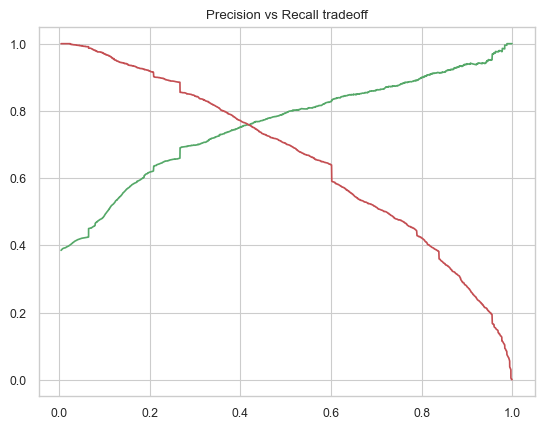

In [583]:
#Let us generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()


As seen from above,there is tradeoff between Precision and Recall.
Precision and Recall are inversely related means if one increases other will genuinely decrease.

# Step 14: Making predictions on the test set

In [584]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.160255,-0.284595,-0.179666,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.540048,-0.284595,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.888650,-0.671384,-1.132538,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,1.643304,-0.284595,-0.179666,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,2.017593,0.295588,0.058552,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [585]:
X_test = X_test[col3]

X_test.shape

(2723, 18)

In [586]:
X_test.head()

,Do Not Email,TotalVisits,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0.143722,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,0.391416,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.351665,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.847051,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3830,0,1.134496,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [587]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [588]:
#making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [589]:
y_test_pred[:10]

3271    0.253260
1490    0.876917
7936    0.162175
4216    0.855017
3830    0.510090
1800    0.904129
6507    0.515118
4821    0.162175
4223    0.957439
4714    0.216058
dtype: float64

In [590]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.253260
1490,0.876917
7936,0.162175
4216,0.855017
3830,0.510090


In [591]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [592]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [593]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [594]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [595]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.253260
1,1,1490,0.876917
2,0,7936,0.162175
3,1,4216,0.855017
4,0,3830,0.510090


In [596]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [597]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [598]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [599]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,3271,0,0.253260,25
1,1490,1,0.876917,88
2,7936,0,0.162175,16
3,4216,1,0.855017,86
4,3830,0,0.510090,51


In [600]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [601]:
y_pred_final.head()


,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,3271,0,0.253260,25,0
1,1490,1,0.876917,88,1
2,7936,0,0.162175,16,0
3,4216,1,0.855017,86,1
4,3830,0,0.510090,51,1


In [602]:
#classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
900,2378,1,0.999192,100,1,Hot Lead
939,8077,1,0.997207,100,1,Hot Lead
222,1867,1,0.997261,100,1,Hot Lead
215,5785,1,0.997207,100,1,Hot Lead
23,5822,1,0.997207,100,1,Hot Lead
...,...,...,...,...,...,...
1132,3696,0,0.007788,1,0,Cold Lead
2367,4883,0,0.007788,1,0,Cold Lead
870,7426,0,0.011663,1,0,Cold Lead
434,7788,0,0.005895,1,0,Cold Lead


In [603]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7447668013220713

In [604]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1345,  389],
       [ 306,  683]], dtype=int64)

In [605]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [606]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6905965621840243

In [607]:
# Let us calculate specificity
TN / float(TN+FP)

0.7756632064590542

In [608]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6371268656716418

In [609]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6905965621840243

Observations from Test data
Accuracy = 74.44%
Sensitivity = 69.05%
Specificity = 77.56%

Observations from Train data
Accuracy = 81.54%
Sensitivity = 70%
Specificity = 89%

#Recommendations 
#### The sales team of the X-Education should focus on the leads having lead origin - lead add form , occupation - Working Professional , Lead source - Wellingak website.
#### Hot Leads are identified as 'Customers having lead score above 45. Sales Team of the company should first focus on the 'Hot Leads'
#### The 'Cold Leads'(Customer having lead score <= 35) should be focused after the Sales Team is done with the 'Hot Leads'.
#### There are many important variables like city, specialization , occupation which can potentially explain Conversion better.It is important for the management to make few of these information mandatory to fill , 
#### so that we can use in our model and build important decisions for the business.
#### It’s better to focus least on customers who do not want to be called about the course.
#### If the Last Notable Activity is Modified, he/she may not be the potential lead.